In [2]:
StartPile = 1201
file = "D:/Eric/Projects/svg/piles.xlsx"

In [17]:
def findphrase(sh, s): #search for row, col of cells that equal to the value of search string
    li = []
    for row in range(sh.nrows):
        for column in range(sh.ncols):
            if s == str(sh.cell(row, column).value).strip():  
                li.append((row, column))
    return li

#unmerge cells for easier finding 
def unmergedValue(rowx,colx,thesheet):
    for crange in thesheet.merged_cells:
        rlo, rhi, clo, chi = crange
        if rowx in xrange(rlo, rhi):
            if colx in xrange(clo, chi):
                return thesheet.cell_value(rlo,clo)
    #if you reached this point, it's not in any merged cells
    return thesheet.cell_value(rowx,colx)

#find value in the df for the particular pier-pileno combination 
def findValue(df, pier, pileno, col):
    result = df[col][(df['Pier']==pier) & (df['PileNo']==pileno)]
    if result.values:
        return result.values[0]
    else:
        return ""
    
#shortcut for creating supplimentary value
def findSuppValue(df, pier, pileno, linebreak):
    result = ''
    val1 = str(findValue(df, pier, pileno, 'PDATestRestrike(3D/14D/28D).Type'))
    val2 = str(findValue(df, pier, pileno, 'PDATestRestrike(3D/14D/28D).RMX(kN)'))
    val3 = str(findValue(df, pier, pileno, 'PDATestRestrike(3D/14D/28D).BTA%'))
    if linebreak == 1:
        if (val1 != '') & (val1 != '-'):
            result = result + val1 + ' '
        if (val2 != '') & (val2 != '-'):
            result = result + val2 + ' '
    elif linebreak == 2:
         if (val3 != '') & (val3 != '-'):
            result = val3 + '%'
    return result



In [15]:
import pandas as pd
import xlrd

xl_workbook = xlrd.open_workbook(file)
sh = xl_workbook.sheet_by_name('All')

findStart = findphrase(sh, 'Pier')
findStartRow = findStart[0][0]
findStartCol = findStart[0][1]

colNames = []


for i in range(findStartCol,findStartCol+54):
    
    colName1 = ''.join(str(unmergedValue(21,i,sh)).split())
    colName2 = ''.join(str(unmergedValue(22,i,sh)).split())
    colName3 = ''.join(str(unmergedValue(23,i,sh)).split())
    colName4 = ''.join(str(unmergedValue(24,i,sh)).split()) 
    colName = colName1

    if(len(colName2) != 0) & (colName2 != colName1):
        colName = colName + "." + colName2
    if(len(colName3) != 0) & (colName2 != colName3):
        colName = colName + "." + colName3
    if(len(colName4) != 0) & (len(colName4) < 3):
        colName = colName + "." + colName4
    colNames.append(colName)

df = pd.read_excel(file, skiprows=25, header=None, names=colNames, sheetname="All", parse_cols = range(findStartCol, findStartCol + 54))
df = df[pd.notnull(df['Pier']) & pd.notnull(df['PileNo'])]
#df.to_csv('piles_df.csv', index=True)
print(df.columns.values)
df

['Pier' 'PileNo' 'PileDrivingdate.Start' 'PileDrivingdate.Finish'
 'BoreholeLocation' 'PileSegments(S-starter,E-extension,T-top).S'
 'PileSegments(S-starter,E-extension,T-top).E1'
 'PileSegments(S-starter,E-extension,T-top).E2'
 'PileSegments(S-starter,E-extension,T-top).E3'
 'PileSegments(S-starter,E-extension,T-top).E4'
 'PileSegments(S-starter,E-extension,T-top).E5'
 'PileSegments(S-starter,E-extension,T-top).T' 'Pilelength(m)'
 'PileToeLevel,mBSD.FromConst.Dwg..Tentative'
 'PileToeLevel,mBSD.Revised.Tentative' 'PileToeLevel,mBSD.Revised.Minimum'
 'Cut-offlevel(mBSD)' 'As-builtPileToeLevel(mBSD)'
 'DifferencebetweenAs-BuiltToeLevelandTentativeToeLevel(m)'
 'DrivenPileLength(m)' 'GroundLevel(mBSD)' 'DesignedConcretePlugLength(m)'
 'ConnectionwithinSplashZone' 'FinalSET(mm/10blows)..fromDrivingrecord'
 'FinalSET(mm/10blows)..Rebound' 'PileheadLevel,mBSD'
 'ConnectionsLevelBSD(m).J5' 'ConnectionsLevelBSD(m).J4'
 'ConnectionsLevelBSD(m).J3' 'ConnectionsLevelBSD(m).J2'
 'ConnectionsLevel

,Pier,PileNo,PileDrivingdate.Start,PileDrivingdate.Finish,BoreholeLocation,"PileSegments(S-starter,E-extension,T-top).S","PileSegments(S-starter,E-extension,T-top).E1","PileSegments(S-starter,E-extension,T-top).E2","PileSegments(S-starter,E-extension,T-top).E3","PileSegments(S-starter,E-extension,T-top).E4",...,Welding.Joint4.Finishtime,Welding.Cooling.Starttime,Welding.Cooling.Finishtime,PITTest10%,PDAtestEOD(20%).Type,PDAtestEOD(20%).RMX(kN),PDAtestEOD(20%).BTA%,PDATestRestrike(3D/14D/28D).Type,PDATestRestrike(3D/14D/28D).RMX(kN),PDATestRestrike(3D/14D/28D).BTA%
0,P1209 S,A,2016-12-11,2016-12-26 00:00:00,GIH1209C,15,15,-,-,-,...,NaN,NaN,NaN,NaT,EOD,5158,81,-,-,-
2,P1209 S,B,2016-12-11,2016-12-25 00:00:00,GIH1209C,15,15,-,-,-,...,NaN,NaN,NaN,2017-02-03,NaN,-,-,-,-,-
4,P1209 S,C,2016-12-11,2016-12-24 00:00:00,GIH1209C,15,15,-,-,-,...,NaN,NaN,NaN,NaT,NaN,-,-,-,-,-
6,P1209 S,D,2016-12-13,2016-12-17 00:00:00,GIH1209C,15,15,-,-,-,...,NaN,NaN,NaN,NaT,NaN,-,-,-,-,-
8,P1208 S,A,2016-11-19,2016-12-27 00:00:00,GIH1208N,15,18,-,-,-,...,NaN,NaN,NaN,NaT,EOD,5087,50,-,-,-
10,P1208 S,B,2016-11-19,2016-12-28 00:00:00,GIH1208N,15,18,-,-,-,...,NaN,NaN,NaN,NaT,NaN,-,-,-,-,-
12,P1208 S,C,2016-11-19,2016-12-29 00:00:00,GIH1208N,15,18,-,-,-,...,NaN,NaN,NaN,2017-02-03,NaN,-,-,-,-,-
14,P1208 S,D,2016-12-19,2017-01-06 00:00:00,GIH1208N,15,18,-,-,-,...,NaN,NaN,NaN,NaT,NaN,-,-,13D,4847,78
16,P1207 S,A,2016-12-30,2017-01-02 00:00:00,GIH1207C,24,11,-,-,-,...,NaN,NaN,NaN,NaT,NaN,-,-,-,-,-
18,P1207 S,B,2016-12-20,2017-01-01 00:00:00,GIH1207C,24,11,-,-,-,...,NaN,NaN,NaN,NaT,NaN,-,-,10D,6241,80


In [21]:
import svgwrite

lineStart = 180
lineEnd = 820
numberOfPiles = 11
sep = 150
width = (numberOfPiles + 1)* sep 
height = 1000
radius = 30
radius_sm = 2
style = "font-size:12px; font-family:Arial"
style_lr = "font-size:18px; font-family:Arial"
style_sm = "font-size:10px; font-family:Arial"
dwg = svgwrite.Drawing('test.svg', size=(width, height))


for i in range(1, numberOfPiles + 1):
    pile_id = "P" + str(StartPile + i - 1) 
    pile_id_N = pile_id + " N"
    pile_id_S = pile_id + " S"
    #vertical lines
    dwg.add(dwg.line((sep * i, lineStart), (sep * i, lineEnd), stroke='black'))
    
    #horizontal lines
    dwg.add(dwg.line((0, 350), (width, 350), stroke='black'))
    dwg.add(dwg.line((0, 495), (width, 495), stroke='black'))
    dwg.add(dwg.line((0, 505), (width, 505), stroke='black'))
    dwg.add(dwg.line((0, 650), (width, 650), stroke='black'))
    
    #circles
    dwg.add(dwg.circle(center=(sep * i, lineStart - radius), r=radius, stroke='black', fill='white'))
    dwg.add(dwg.text(pile_id, insert=(sep * i - 25, lineStart - radius + 5), style = style_lr))
 
    #text above circles
    dwg.add(dwg.text(findValue(df, pile_id_N, "A", "PileToeLevel,mBSD.Revised.Minimum"), insert=(sep * i - 10, lineStart - radius - 70), style = style))
    dwg.add(dwg.text(findValue(df, pile_id_N, "A", "PileToeLevel,mBSD.Revised.Tentative"), insert=(sep * i  - 10, lineStart - radius - 55), style = style))
    dwg.add(dwg.text(findValue(df, pile_id_N, "A", "PileToeLevel,mBSD.FromConst.Dwg..Tentative"), insert=(sep * i  - 10, lineStart - radius - 40), style = style))
    
    b = ["A", "B", "C", "D"]
    #small circles
    for j in range(1, 5):
        dwg.add(dwg.circle(center=(sep * i, 350 + 30 * j), r=radius_sm, stroke='black', fill='white'))
        dwg.add(dwg.text(findValue(df, pile_id_N, b[4 - j], "As-builtPileToeLevel(mBSD)"), insert=(sep * i + 10, 350 + 30 * j), style = style))
        dwg.add(dwg.text(findSuppValue(df, pile_id_N, b[4 - j], 1), insert=(sep * i - 60, 350 + 30 * j - 5), style = style_sm))
        dwg.add(dwg.text(findSuppValue(df, pile_id_N, b[4 - j], 2), insert=(sep * i - 60, 350 + 30 * j + 5), style = style_sm))
        dwg.add(dwg.text(findValue(df, pile_id_N, b[4 - j], "FinalSET(mm/10blows)..fromDrivingrecord"), insert=(sep * i + 50, 350 + 30 * j - 5), style = style_sm))
        dwg.add(dwg.text(findValue(df, pile_id_N, b[4 - j], "FinalSET(mm/10blows)..Rebound"), insert=(sep * i + 50, 350 + 30 * j + 5), style = style_sm))
        
        dwg.add(dwg.circle(center=(sep * i, 500 + 30 * j), r=radius_sm, stroke='black', fill='white'))
        dwg.add(dwg.text(findValue(df, pile_id_S, b[j - 1], "As-builtPileToeLevel(mBSD)"), insert=(sep * i + 10, 500 + 30 * j), style = style))
        dwg.add(dwg.text(findSuppValue(df, pile_id_S, b[j - 1], 1), insert=(sep * i - 60, 500 + 30 * j - 5), style = style_sm))
        dwg.add(dwg.text(findSuppValue(df, pile_id_S, b[j - 1], 2), insert=(sep * i - 60, 500 + 30 * j + 5), style = style_sm))
        dwg.add(dwg.text(findValue(df, pile_id_S, b[j - 1], "FinalSET(mm/10blows)..fromDrivingrecord"), insert=(sep * i + 50, 500 + 30 * j - 5), style = style_sm))
        dwg.add(dwg.text(findValue(df, pile_id_S, b[j - 1], "FinalSET(mm/10blows)..Rebound"), insert=(sep * i + 50, 500 + 30 * j + 5), style = style_sm))
        
    #text
dwg.save()

In [23]:
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF, renderPM
drawing = svg2rlg("test.svg")
scaleFactor = 3
drawing.width *= scaleFactor
drawing.height *= scaleFactor
drawing.scale(scaleFactor, scaleFactor)
StartPileID= "P" + str(StartPile)
renderPDF.drawToFile(drawing, StartPileID + ".pdf")
renderPM.drawToFile(drawing, StartPileID + ".png")

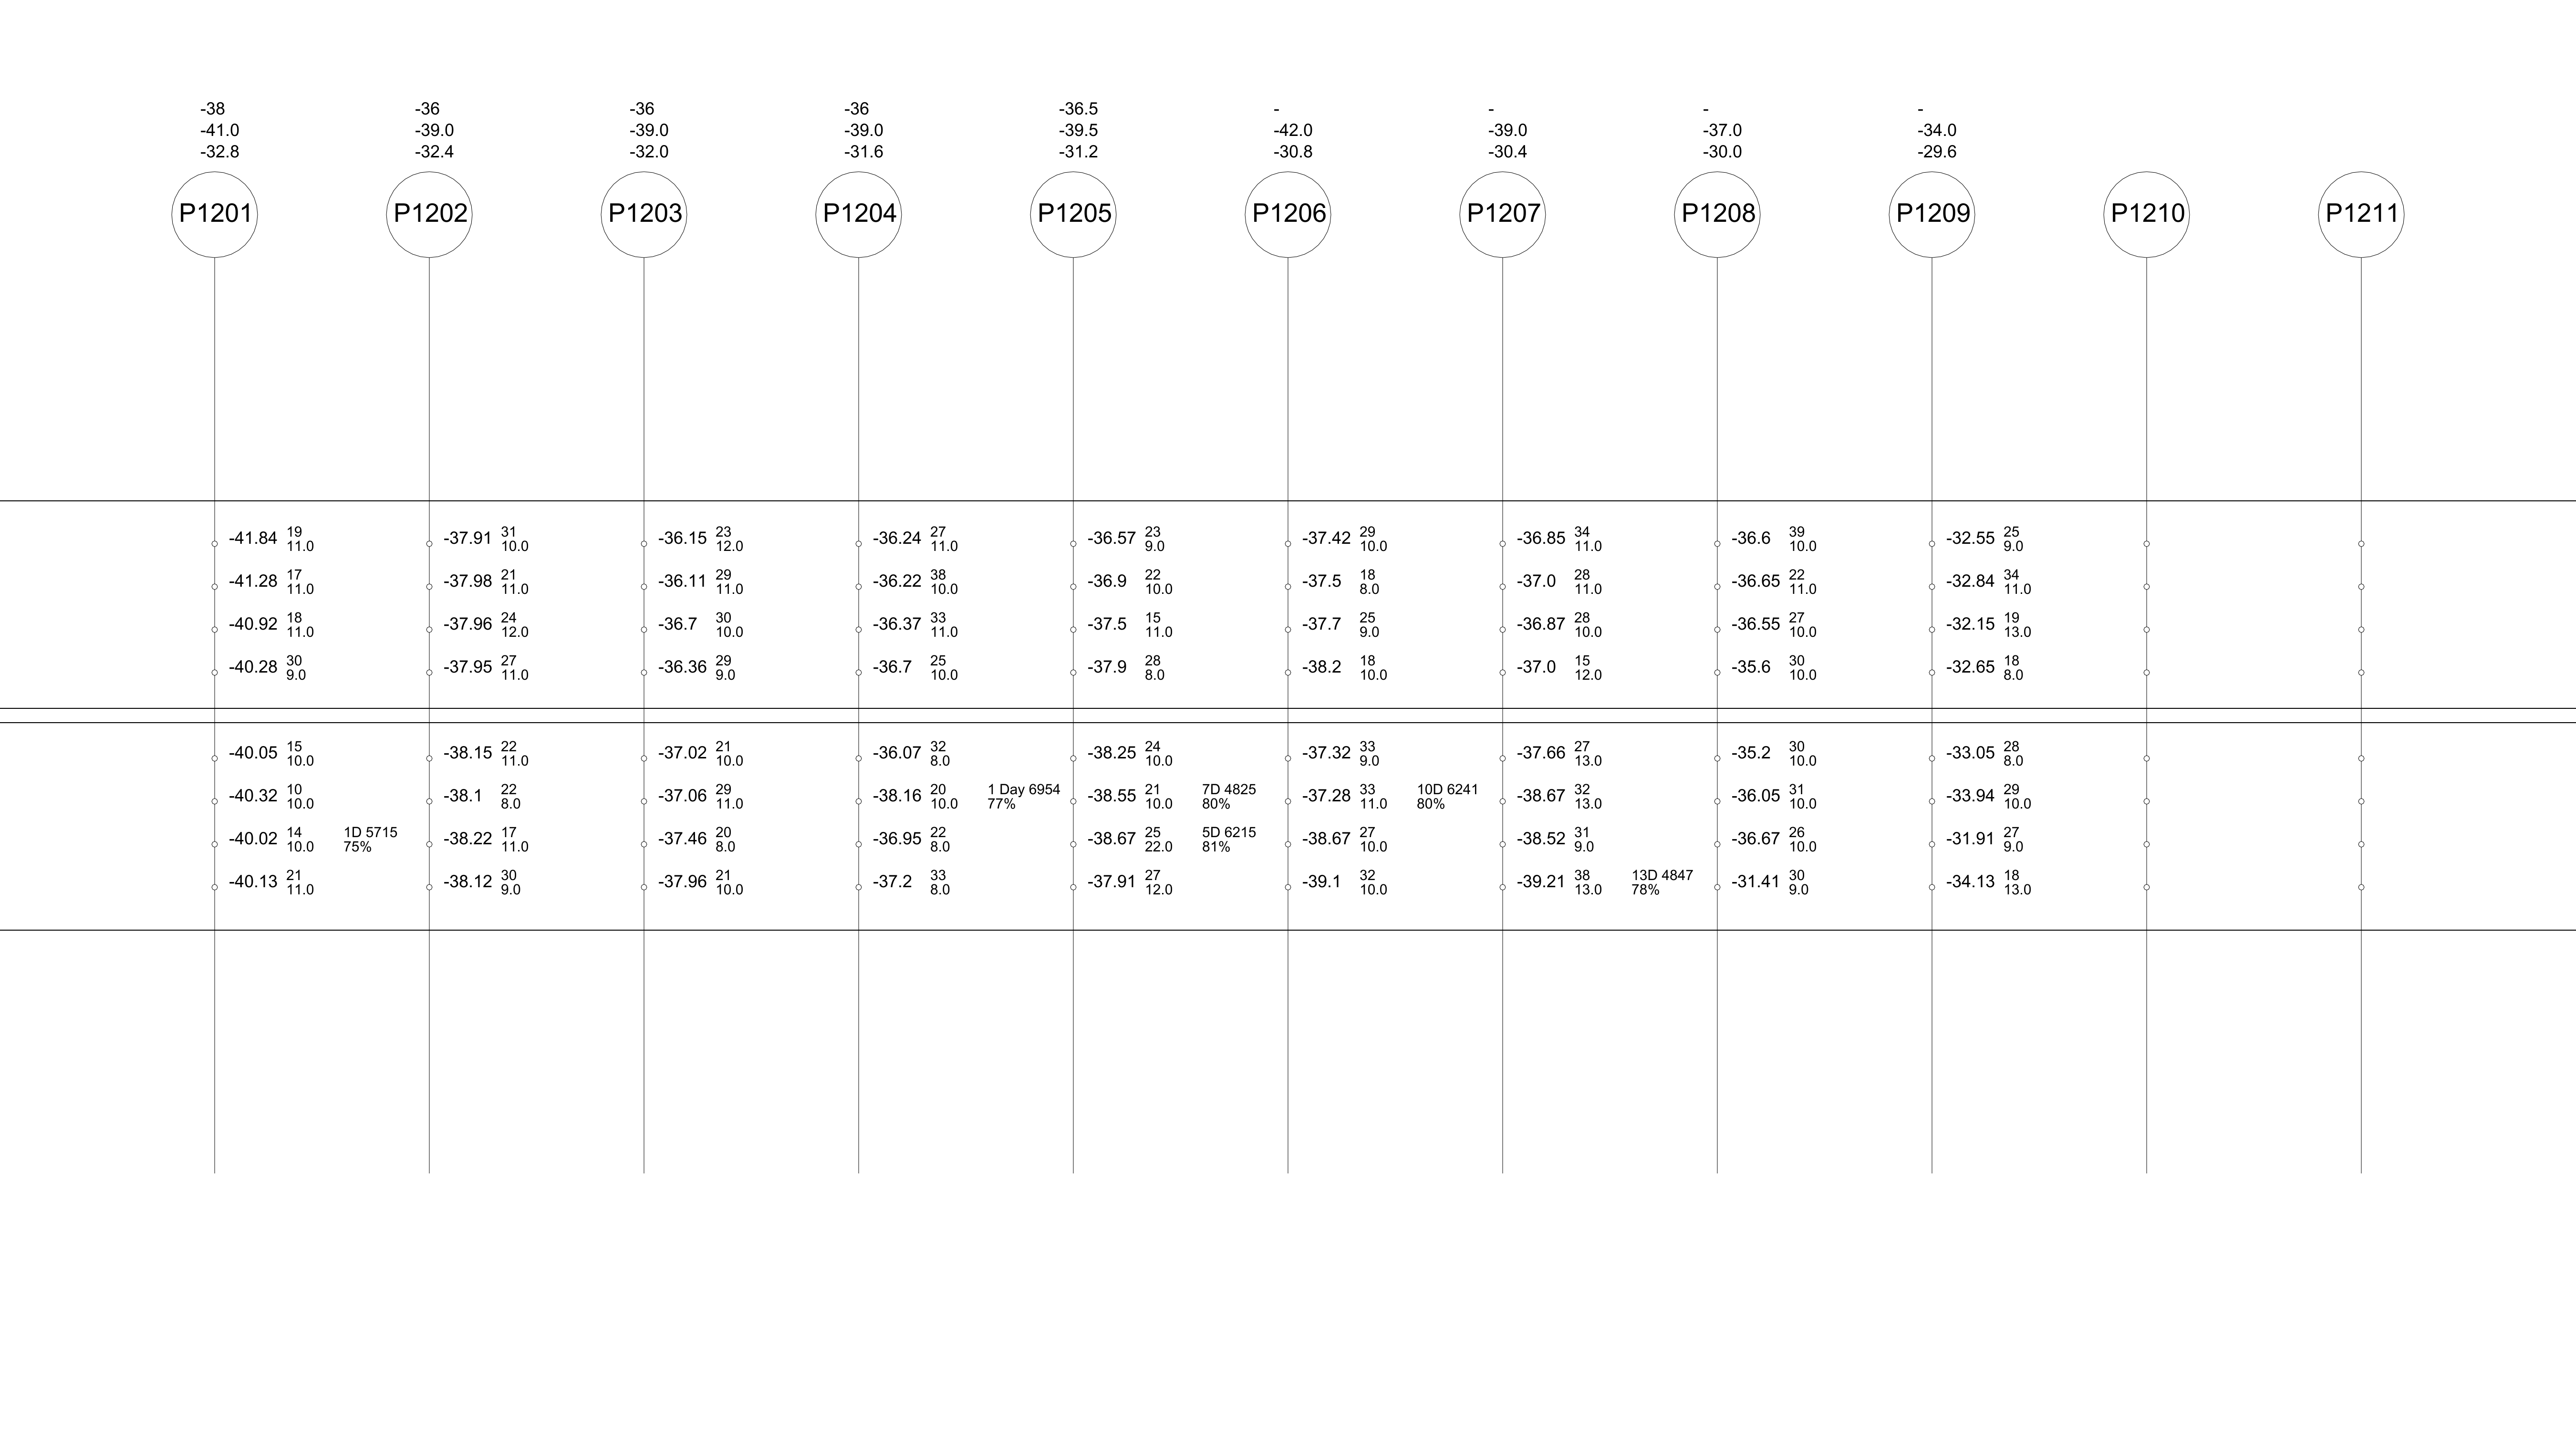

In [24]:
from IPython.display import Image
Image(StartPileID + ".png")